<a href="https://colab.research.google.com/github/krishnatejavv/Covid/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"krishnatejavv","key":"e40a071e8157e1ea8b3fa2a62ca02a44"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [4]:
!kaggle datasets download -d roche-data-science-coalition/uncover

 92% 113M/123M [00:01<00:00, 69.1MB/s] 
100% 123M/123M [00:01<00:00, 90.7MB/s]


In [6]:
!mkdir covid

mkdir: cannot create directory ‘covid’: File exists


In [0]:
!unzip -q uncover.zip -d covid

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data= pd.read_csv('/content/covid/UNCOVER/worldometer/worldometer/worldometer-confirmed-cases-and-deaths-by-country-territory-or-conveyance.csv')

In [9]:
data.head(5)

,country,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious_critical_cases,total_cases_per_1m_pop,total_deaths_per_1m_pop
0,World,1361024,"+15,020",76201.0,"+1,547",293617.0,991206,47544.0,175.0,9.8
1,USA,367659,+655,10943.0,+72,19814.0,336902,8983.0,1111.0,33.0
2,Spain,140510,"+3,835",13798.0,+457,43208.0,83504,7069.0,3005.0,295.0
3,Italy,132547,NaN,16523.0,NaN,22837.0,93187,3898.0,2192.0,273.0
4,Germany,103375,NaN,1810.0,NaN,36081.0,65484,4895.0,1234.0,22.0


In [37]:
data.shape

(213, 10)

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  213 non-null    object 
 1   total_cases              213 non-null    int64  
 2   new_cases                77 non-null     object 
 3   total_deaths             159 non-null    float64
 4   new_deaths               42 non-null     object 
 5   total_recovered          177 non-null    float64
 6   active_cases             213 non-null    int64  
 7   serious_critical_cases   126 non-null    float64
 8   total_cases_per_1m_pop   211 non-null    float64
 9   total_deaths_per_1m_pop  157 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 16.8+ KB


In [11]:
data.shape

(213, 10)

In [12]:
data.describe()

,total_cases,total_deaths,total_recovered,active_cases,serious_critical_cases,total_cases_per_1m_pop,total_deaths_per_1m_pop
count,2.130000e+02,159.000000,177.000000,213.000000,126.000000,211.000000,157.000000
mean,1.916935e+04,1437.754717,4976.559322,13960.647887,1132.000000,454.523175,22.308217
std,1.345201e+05,8720.761396,31916.092176,98759.005244,6069.276997,1148.459954,86.648769
min,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.090000,0.020000
25%,1.900000e+01,2.000000,5.000000,17.000000,4.000000,10.000000,0.400000
50%,2.380000e+02,9.000000,41.000000,178.000000,14.000000,75.000000,2.000000
75%,1.462000e+03,61.500000,191.000000,1160.000000,89.000000,316.000000,9.800000
max,1.361024e+06,76201.000000,293617.000000,991206.000000,47544.000000,8739.000000,943.000000


In [13]:
data.corr()

,total_cases,total_deaths,total_recovered,active_cases,serious_critical_cases,total_cases_per_1m_pop,total_deaths_per_1m_pop
total_cases,1.000000,0.989527,0.977894,0.997835,0.994908,0.011091,0.028270
total_deaths,0.989527,1.000000,0.976758,0.983060,0.991860,0.029467,0.067560
total_recovered,0.977894,0.976758,1.000000,0.962165,0.977030,0.004879,0.024544
active_cases,0.997835,0.983060,0.962165,1.000000,0.990868,0.011133,0.025465
serious_critical_cases,0.994908,0.991860,0.977030,0.990868,1.000000,0.003410,0.032340
total_cases_per_1m_pop,0.011091,0.029467,0.004879,0.011133,0.003410,1.000000,0.791440
total_deaths_per_1m_pop,0.028270,0.067560,0.024544,0.025465,0.032340,0.791440,1.000000


In [14]:
data.isnull().sum()

country                      0
total_cases                  0
new_cases                  136
total_deaths                54
new_deaths                 171
total_recovered             36
active_cases                 0
serious_critical_cases      87
total_cases_per_1m_pop       2
total_deaths_per_1m_pop     56
dtype: int64

In [0]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [0]:
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [15]:
data.style.background_gradient(cmap='Reds')

In [16]:
df=data.groupby('country')['total_cases'].sum().sort_values(ascending=False).to_frame()

df.style.background_gradient(cmap='Reds')



,total_cases
country,
World,1361024
Total:,1361024
USA,367659
Spain,140510
Italy,132547
Germany,103375
France,98010
China,81740
Iran,62589


In [0]:
df2=data.groupby('country')['total_deaths'].sum().sort_values(ascending=False).to_frame()
df2.style.background_gradient(cmap='Reds')

,total_deaths
country,
World,76201.000000
Total:,76201.000000
Italy,16523.000000
Spain,13798.000000
USA,10943.000000
France,8911.000000
UK,5373.000000
Iran,3872.000000
China,3331.000000


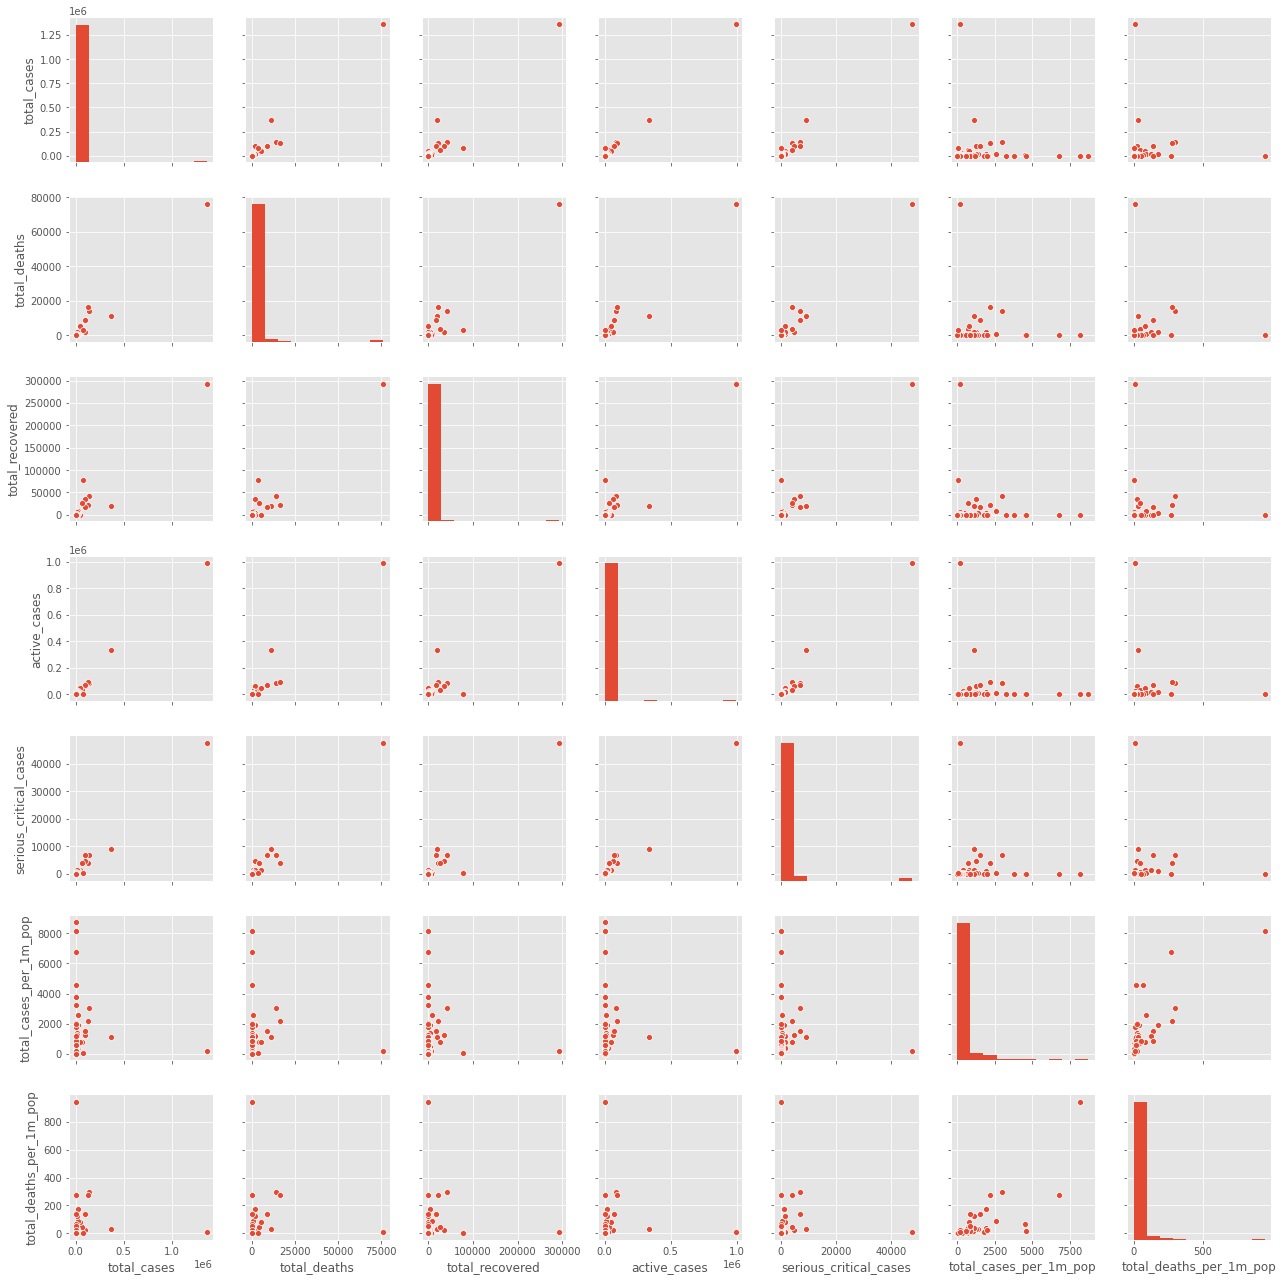

In [18]:
sns.pairplot(data)

<BarContainer object of 5 artists>

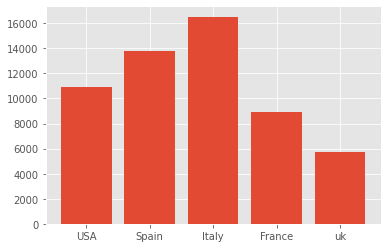

In [25]:
x=['USA','Spain','Italy','France','uk']
y=[10943,13798,16523,8911,5733]
plt.bar(x,height=y)


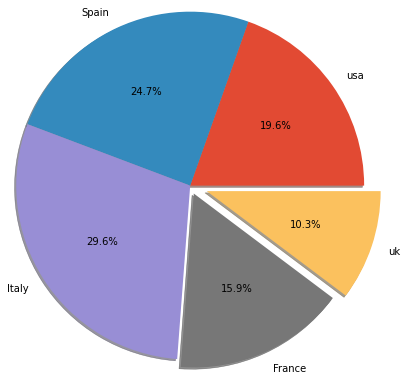

In [38]:
x=["usa","Spain","Italy","France","uk"]
y=[10943,13798,16523,8911,5733]
plt.axis('equal')
plt.pie(y,labels=x,shadow=True, autopct='%1.1f%%',radius=2,explode=[0,0,0,0.1,0.2])
plt.show()

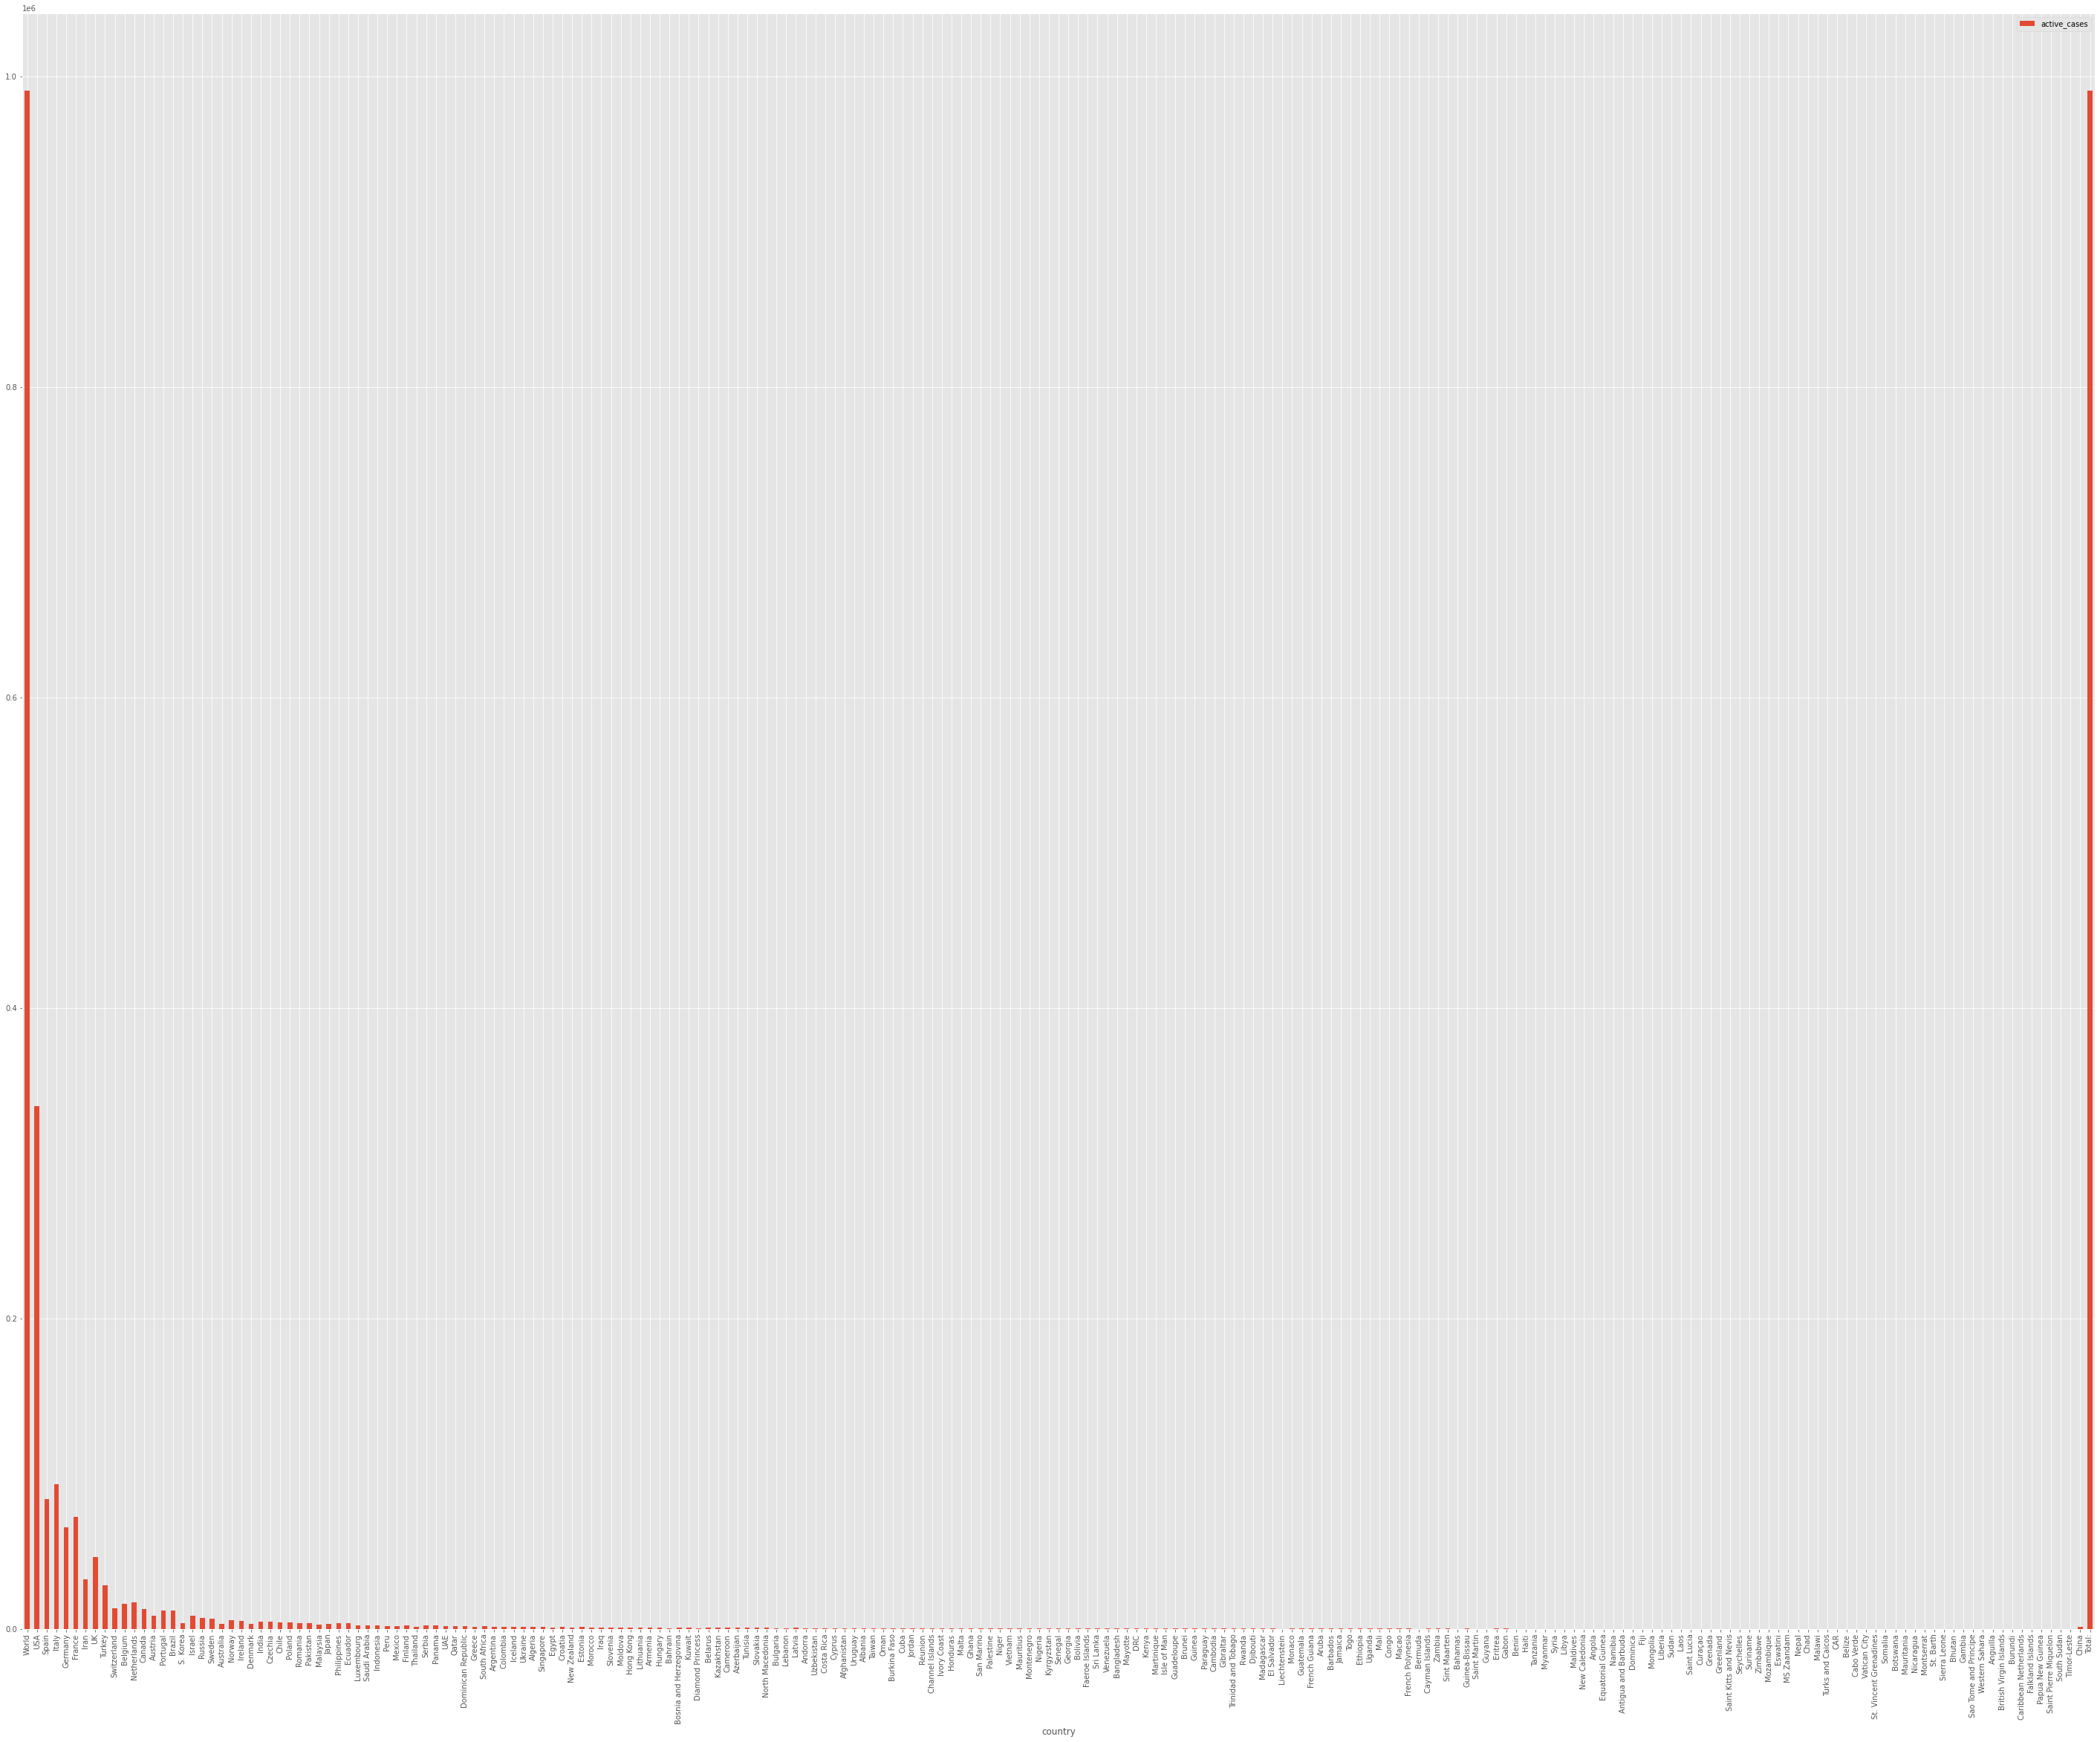

In [41]:
data.plot(kind='bar',x='country',y='active_cases',figsize=(50,40))
plt.show()